# Data Exploration

In [5]:
%matplotlib inline

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import shapely.wkt
import geopandas as gpd

In [4]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires = pd.read_sql_query("""select * from fires""", conn)

df_causes = pd.read_sql_query("""select distinct cause_code, cause_descr as cause from fires""", conn)

df_years = pd.read_sql_query("""select distinct year from fires""", conn)

print(df_fires.info())

print(df_fires.isna().any())

conn.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121535 entries, 0 to 121534
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fod_id           121535 non-null  int64  
 1   date             121535 non-null  object 
 2   year             121535 non-null  int64  
 3   month            121535 non-null  int64  
 4   lat              121535 non-null  float64
 5   long             121535 non-null  float64
 6   fips             121535 non-null  int64  
 7   discovery_date   121535 non-null  float64
 8   discovery_doy    121535 non-null  int64  
 9   cause_code       121535 non-null  int64  
 10  cause_descr      121535 non-null  object 
 11  fire_size        121535 non-null  float64
 12  fire_size_class  121535 non-null  object 
 13  latitude         121535 non-null  float64
 14  longitude        121535 non-null  float64
 15  shape            121535 non-null  object 
dtypes: float64(6), int64(6), object(4)
mem

  fire_size_class  count  smallest    largest
0               A  63635     0.001       0.25
1               B  49445     0.260       9.90
2               C   5770    10.000      99.00
3               D   1248   100.000     299.00
4               E    690   300.000     999.00
5               F    462  1000.000    4913.00
6               G    285  5000.000  315578.80


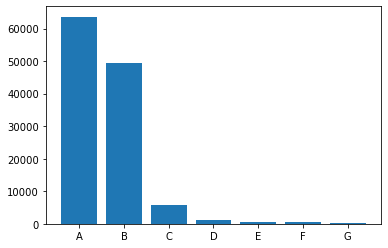

In [6]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fire_class = pd.read_sql_query("""
select fire_size_class, count(*) as count, min(fire_size) as smallest, max(fire_size) as largest
from fires
group by fire_size_class
order by fire_size_class
""", conn)

print(df_fire_class)
plt.bar('fire_size_class', 'count', data = df_fire_class)

conn.close()

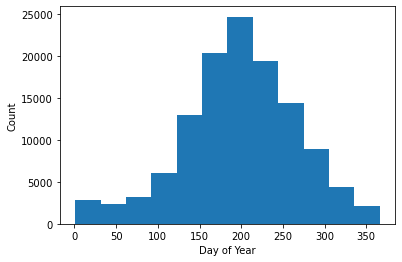

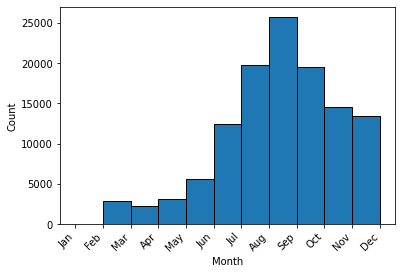

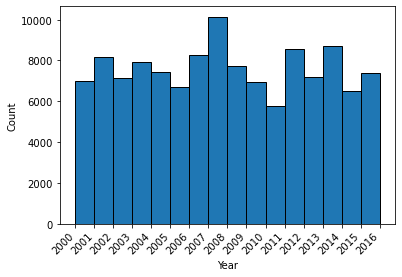

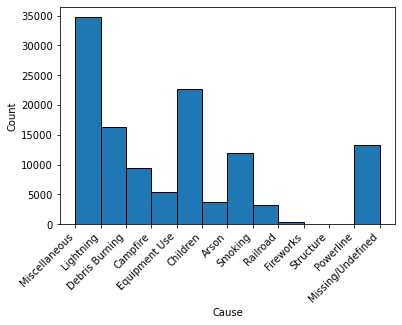

In [7]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires = pd.read_sql_query("""select * from fires""", conn)

conn.close()

plt.xlabel('Day of Year')
plt.ylabel('Count')
plt.hist(df_fires.discovery_doy, bins=12)
plt.show()

plt.xlabel('Month')
plt.xticks(
  range(12),
  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
  rotation=45,
  ha='right')
plt.ylabel('Count')
plt.hist(df_fires.month, bins=range(12), ec='black')
plt.show()

plt.xlabel('Year')
plt.xticks(range(2000, 2017), rotation=45, ha='right')
plt.ylabel('Count')
plt.hist(df_fires.year, bins=range(2000, 2017), ec='black')
plt.show()

causes_range = range(len(df_causes))
plt.xlabel('Cause')
plt.xticks(causes_range, rotation=45, ha='right')
plt.ylabel('Count')
plt.hist(df_fires.cause_descr, bins=causes_range, ec='black')
plt.show()


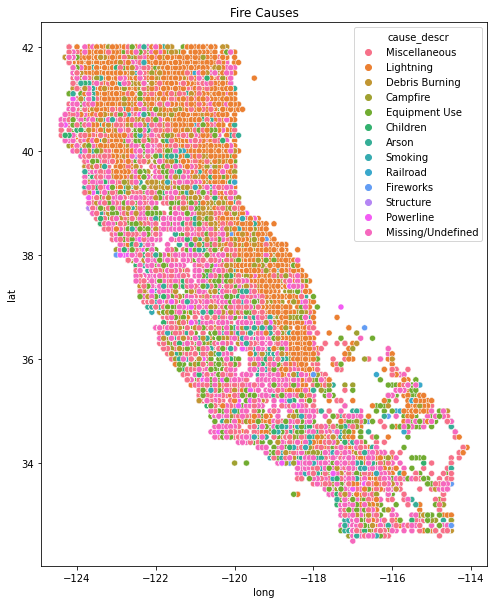

In [71]:
plt.figure(figsize=(8, 10))
plt.title('Fire Causes')
sns.scatterplot(x='long', y='lat', data=df_fires, hue='cause_descr')
plt.show()

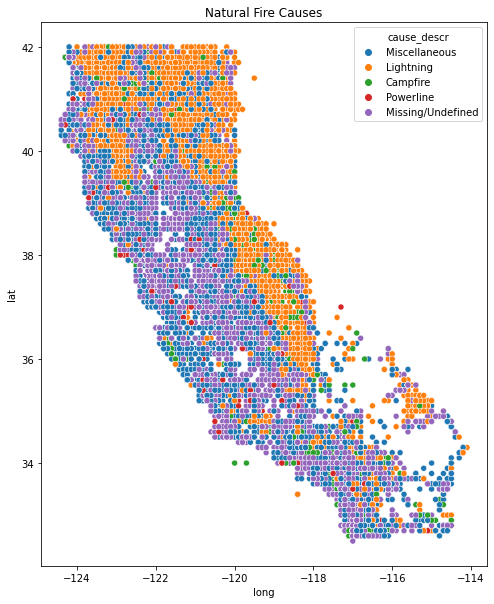

In [117]:
df_fires_natural = df_fires[
  df_fires.cause_descr.isin(
    ['Miscellaneous', 'Lightning', 'Powerline', 'Missing/Undefined', 'Debris Buring', 'Campfire']
  )]

plt.figure(figsize=(8, 10))
plt.title('Natural Fire Causes')
sns.scatterplot(x='long', y='lat', data=df_fires_natural, hue='cause_descr')
plt.show()

In [9]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_soil = pd.read_sql_query("""select * from soil""", conn)

print(df_soil.describe())

conn.close()

             long        lat         fips   latitude   longitude    elevation  \
count   58.000000  58.000000    58.000000  58.000000   58.000000    58.000000   
mean  -120.741379  37.836207  6058.000000  37.838006 -120.749521   621.551724   
std      1.927368   2.160304    33.773757   2.158956    1.938832   666.561487   
min   -124.000000  33.000000  6001.000000  33.023604 -123.980998     0.000000   
25%   -122.000000  36.650000  6029.500000  36.648278 -122.034464    91.750000   
50%   -120.900000  38.050000  6058.000000  38.036634 -120.916086   425.500000   
75%   -119.825000  39.275000  6086.500000  39.246954 -119.839862   823.250000   
max   -115.400000  41.700000  6115.000000  41.749903 -115.355395  2630.000000   

       slope_005  slope_005_02  slope_02_05  slope_05_10  ...  \
count  58.000000     58.000000    58.000000    58.000000  ...   
mean    0.042236      0.185560     0.115616     0.118331  ...   
std     0.078355      0.266131     0.113343     0.103988  ...   
min     0.

In [10]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_weather_county = pd.read_sql_query("""select * from weather_county""", conn)

conn.close()

In [11]:
print(df_weather_county.describe())

                year           fips  precipitation       pressure  \
count  338952.000000  338952.000000  338952.000000  338952.000000   
mean     2007.498973    6058.000000       1.600754      94.040500   
std         4.609853      33.481387       5.391370       6.032349   
min      2000.000000    6001.000000       0.000000      72.920000   
25%      2003.750000    6029.000000       0.000000      91.170000   
50%      2007.500000    6058.000000       0.010000      95.800000   
75%      2011.250000    6087.000000       0.290000      98.920000   
max      2015.000000    6115.000000     107.760000     103.240000   

         humidity_2m        temp_2m  temp_dew_point_2m  temp_wet_bulb_2m  \
count  338952.000000  338952.000000      338952.000000     338952.000000   
mean        5.761598      14.144045           3.925408          3.977946   
std         1.914769       8.004082           5.628715          5.553526   
min         0.620000     -18.310000         -23.100000        -21.630000  

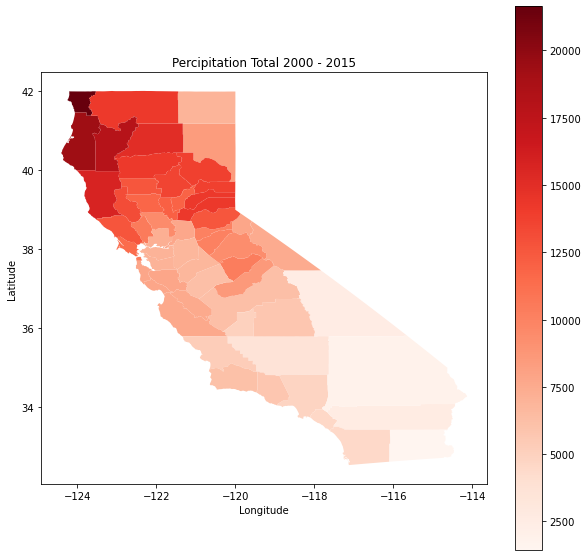

In [12]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_precip = pd.read_sql_query("""select precip.total, long, lat, geo_multipolygon
from (
  select sum(precipitation) as total, fips
  from weather_county
  group by fips
) as precip
inner join county on
  county.fips = precip.fips
""", conn)

conn.close()

fig, ax = plt.subplots(1, figsize=(10, 10))

gs_county = gpd.GeoSeries.from_wkt(df_precip.geo_multipolygon)
gdf_precip = gpd.GeoDataFrame(df_precip, geometry=gs_county)

gdf_precip.plot(column='total', cmap='Reds', ax=ax)

bar_precip = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=df_precip.total.min(), vmax=df_precip.total.max()))
fig.colorbar(bar_precip)

plt.title(f'Percipitation Total {df_years.year.min()} - {df_years.year.max()}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

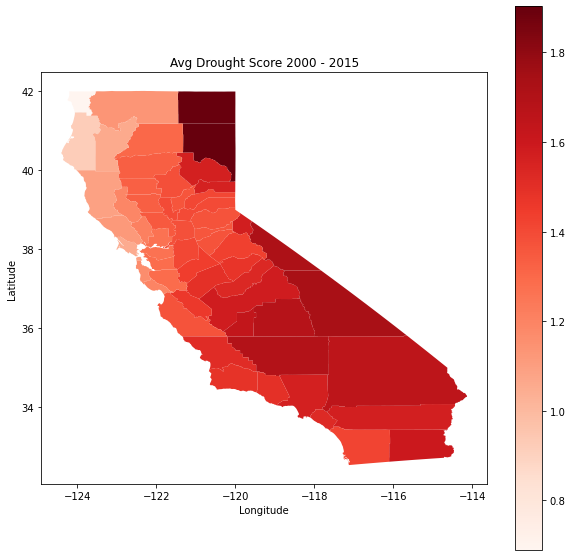

In [150]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_drought = pd.read_sql_query("""select drought.score, long, lat, geo_multipolygon
from (
  select avg(drought_score) as score, fips
  from weather_county
  group by fips
) as drought
inner join county on
  county.fips = drought.fips
""", conn)

conn.close()

fig, ax = plt.subplots(1, figsize=(10, 10))

gs_county = gpd.GeoSeries.from_wkt(df_drought.geo_multipolygon)
gdf_drought = gpd.GeoDataFrame(df_drought, geometry=gs_county)

gdf_drought.plot(column='score', cmap='Reds', ax=ax)

bar_drought = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=df_drought.score.min(), vmax=df_drought.score.max()))
fig.colorbar(bar_drought)

plt.title(f'Avg Drought Score {df_years.year.min()} - {df_years.year.max()}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

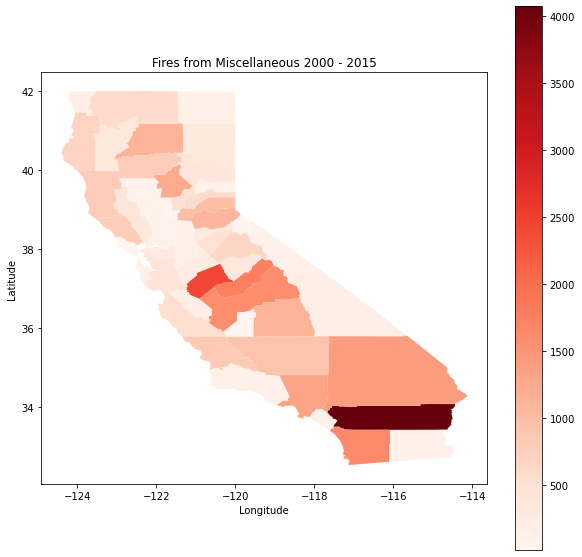

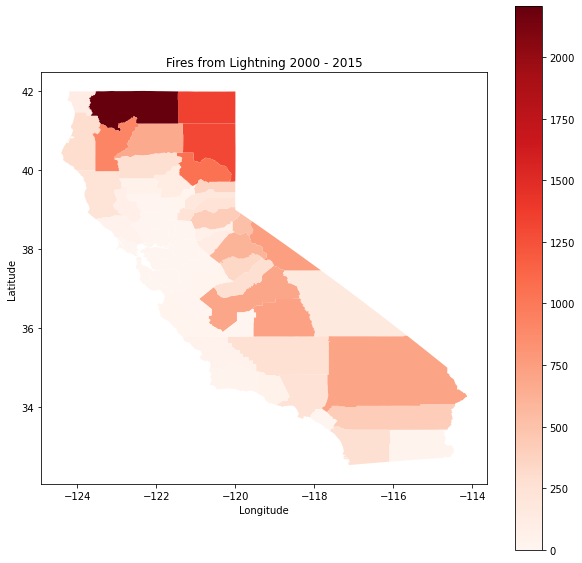

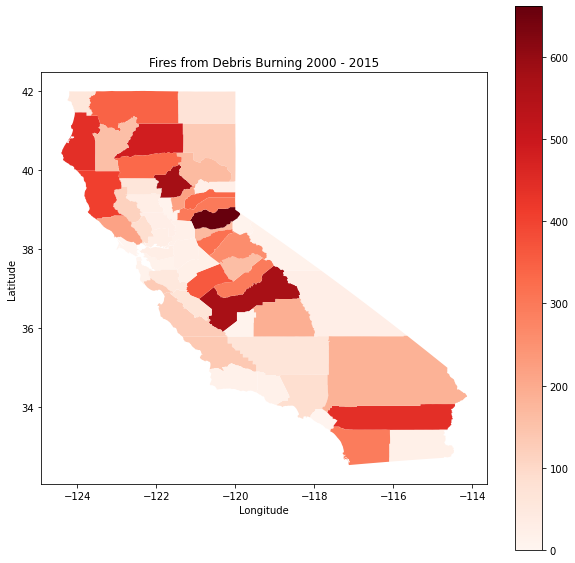

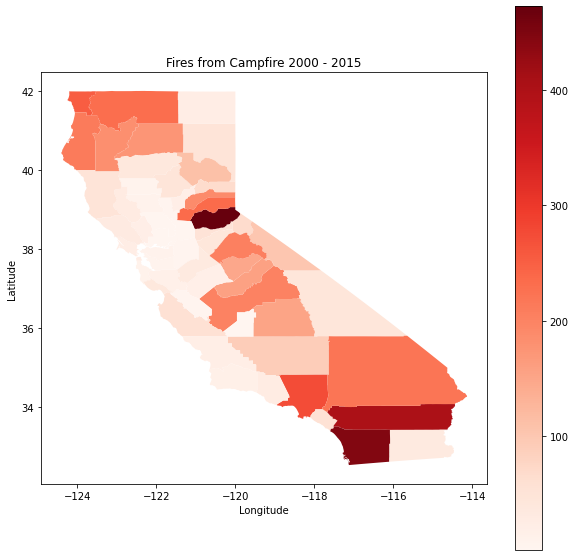

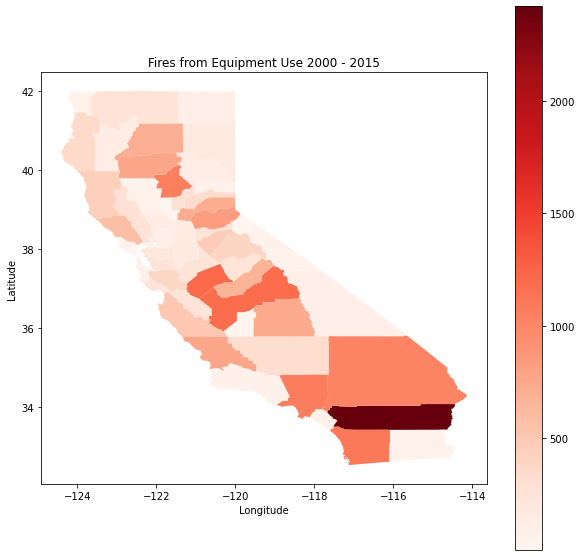

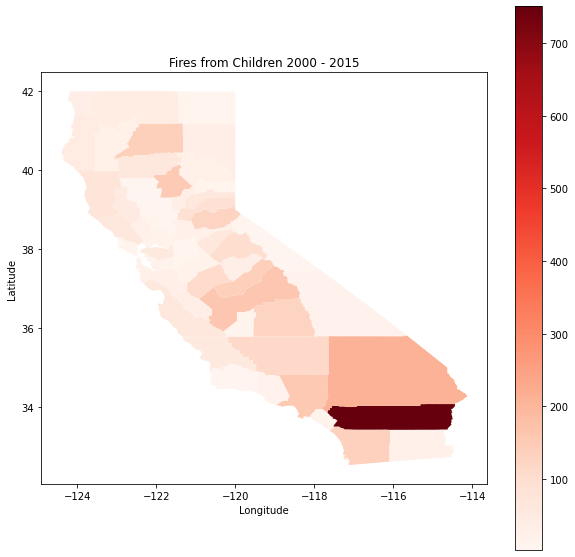

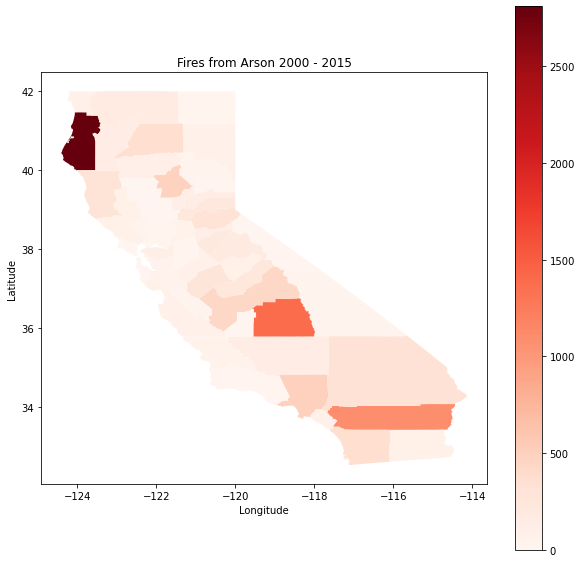

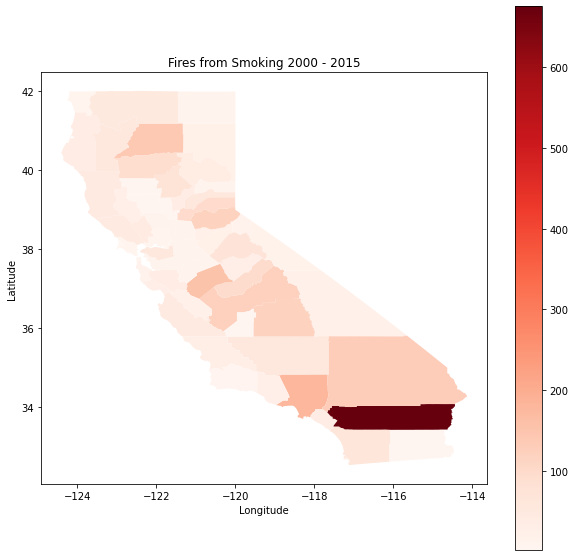

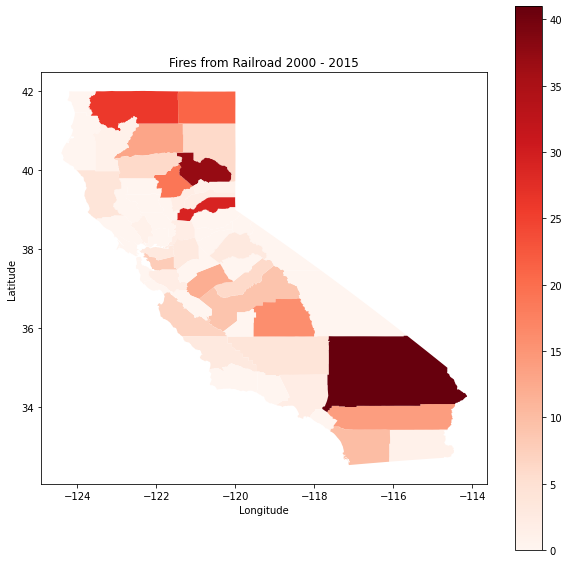

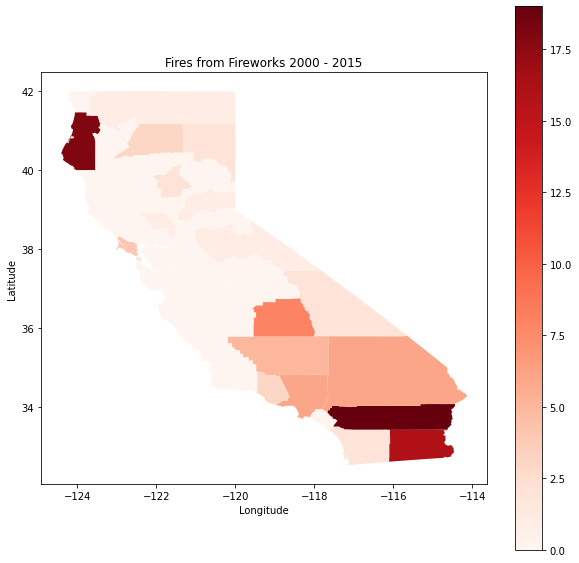

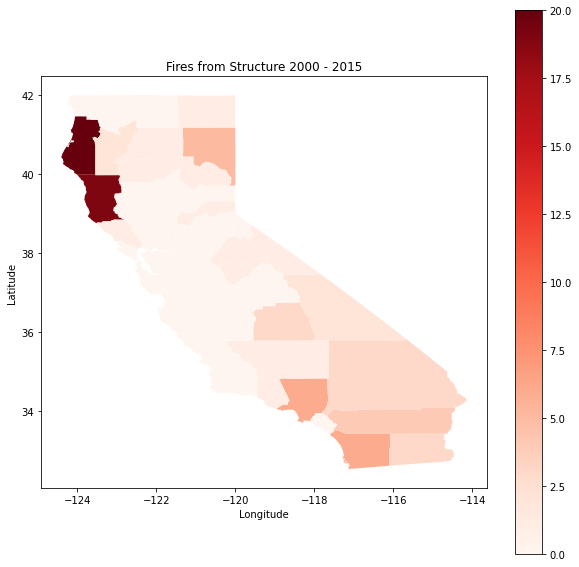

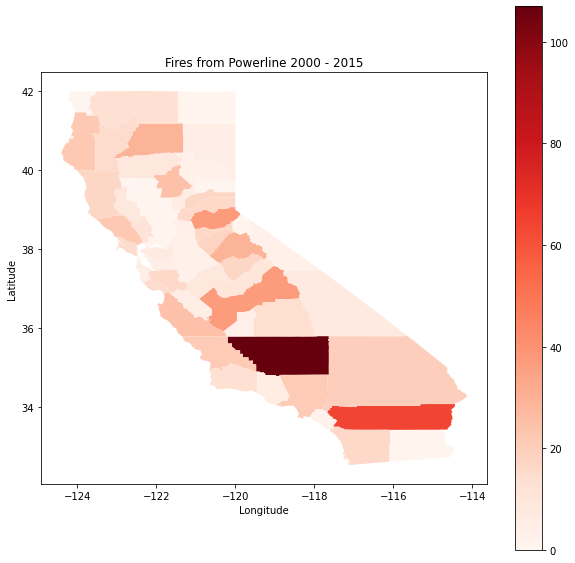

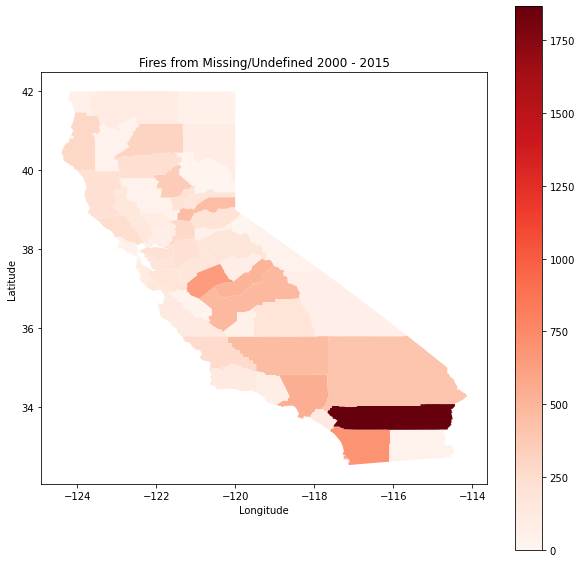

In [64]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires = pd.read_sql_query("""
select
  ifnull(fire_counts.total, 0) as total, causes.cause, long, lat, geo_multipolygon
from county
cross join (
  select distinct cause_descr as cause
  from fires
) as causes
left outer join (
  select count(*) as total, cause_descr as cause, fips
  from fires
  group by fips, cause_descr
) as fire_counts on
  fire_counts.fips = county.fips
  and fire_counts.cause = causes.cause
""", conn)

conn.close()

gs_county = gpd.GeoSeries.from_wkt(df_fires.geo_multipolygon)
gdf_fires = gpd.GeoDataFrame(df_fires, geometry=gs_county)

for cause in df_causes.cause:
  fig, ax = plt.subplots(1, figsize=(10, 10))

  gdf_cause = gdf_fires[gdf_fires.cause == cause]
  gdf_cause.plot(column='total', cmap='Reds', ax=ax)

  bar_fires = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=gdf_cause.total.min(), vmax=gdf_cause.total.max()) )
  fig.colorbar(bar_fires)

  plt.title(f'Fires from {cause} {df_years.year.min()} - {df_years.year.max()}')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.show()

### Test-Train-Split

#### Splitting for 2000-2015

- Train 2000-13 (13 years)
- Validation 2013-14 (1 year)
- Test 2014-15 (1 years)

#### How to Process 13 years of data?

- NN might allow batching
- Regression models for 0% - 100% per long/lat grid (55x55 km)
- Reduce long/lat grid (11x11 km)
- Visualize with heatmap
- Focus on origin long/lat

#### Models

1.  Linear
2.  Random Forest Regression
3.  ...any regression model